# Part 0: Hello Qiskit Pulse
Qiskit-Pulse is a open-source pulse-level quantum programming kit. This lower level of programming offers the user more control than programming with the QuantumCircuit.

Qiskit Pulse was release public by this paper, 14 Apr 2020: https://arxiv.org/abs/2004.06755 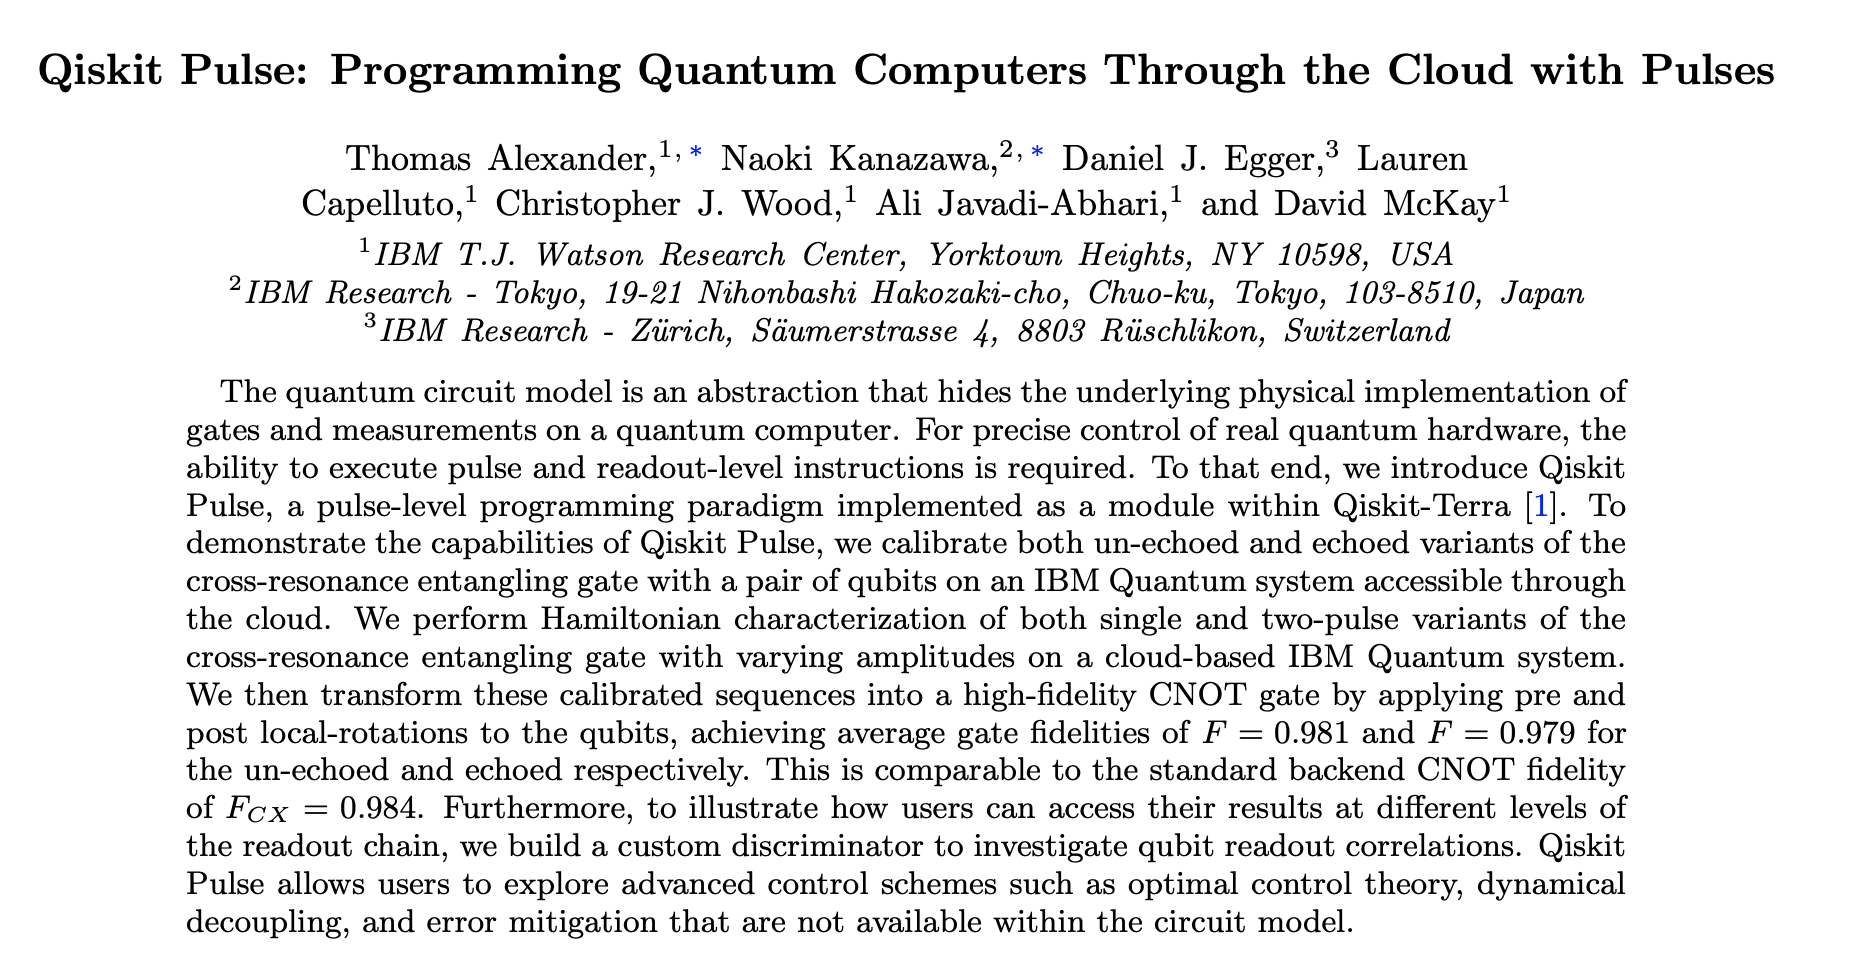

The main motivation of the Qiskit pulse is provide hardware level access to the users mainly for:
- Optimal control upon the quantum hardware https://www.nature.com/articles/s41534-020-00346-2
- Error mitigation https://www.nature.com/articles/s41586-019-1040-7 
- Dynamical decoupling https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.1.020318 

With this 2nd lecture, we will demonstrate:

Part 1: Qiskit Pulse Basic - Essential pulse syntax (10min)
- Build pulse schedule with the Pulse Builder : Builder, Channels, Instructions, Contexts, Macros
- Circuit Gates
    - Single Qubit Gate

Part 2: Access qubit property by using Qiskit Pulse (30 min)
- Qubit Frequency
- T1
- T2

Part 3: Qutrit system (30 min)
- Access to the |2> state
- Calibrate the measurement for the Qutrit system
- Tutorial: Build X12, X02

Assignment: 
Build an H02 Gate - equal populate hadamard gate of the qutrit and plot the counting result

So let's start Part1 lecture- the basic of the Qiskit pulse



# Part1: Qiskit Pulse Basic

At here I wanto to give you some brief explanation about how the pulse control works with the superconducting qubit. 

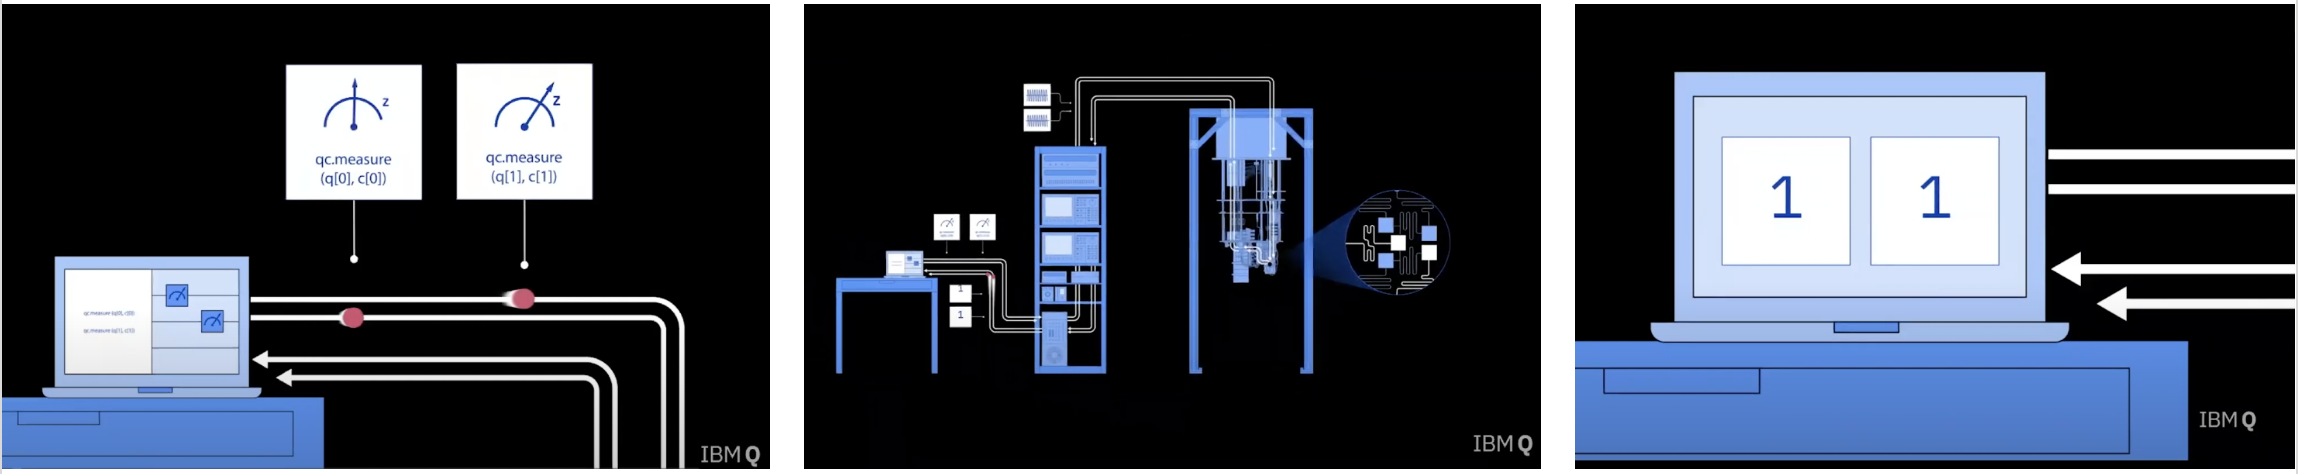

When we compose a quantum circuit by using QuantumCircuit, it is transpiled into basis gates according to each backend and defines the register to perform the "measurement". The Qiskit sends this information - The circuit information and the register information - to the quantum backend through its cloud API, then it composes the actual pulse signal series to work with the superconducting qubit and do actual experiments upon the quantum hardware. After getting the measurement result by reading the classical register, the Qiskit API delivers this result to us.

Before learning about how to build a pulse signal for the quantum backend, let's simply check this circuit-pulse-experiment pipeline by using qiskit just glance at the example of the typical quantum circuit - the entanglement circuit.

In [1]:
## import essential libraries
import numpy as np

from qiskit import *
from qiskit.tools.monitor import job_monitor

from qiskit import assemble,pulse,QuantumCircuit,schedule,transpile
from qiskit.pulse.channels import ControlChannel, DriveChannel

from qiskit.circuit import Gate
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.test.mock import FakeValencia
from qiskit.visualization import plot_histogram

from qiskit.visualization.pulse_v2 import draw, IQXSimple, IQXDebugging,IQXStandard


In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')

#check open_pulse ibmq device that you can use
provider.backends(simulator=False, open_pulse=True)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

IBMQ_Armonk is the only real backend (even though it is a simulator) and it only support 1 qubit. Current, other FakeBacked has an old backend configuration so returns weired result while running pulse simulation - especially with the H gate.

So let's check how much the result is weired and use FakeValencia for our hands-on.

In [3]:
#define pulsesimulator from the backend profile

backend = FakeValencia()

# setting for build pulse simulation
model = PulseSystemModel.from_backend(backend)
qubit_lo_freq = model.hamiltonian.get_qubit_lo_from_drift()
backend_sim = PulseSimulator(system_model = model)
backend_sim.set_options(qubit_lo_freq=backend.defaults().qubit_freq_est)


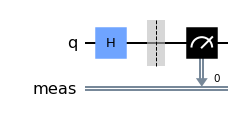

In [4]:
#step1: composing circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

qc.draw('mpl')

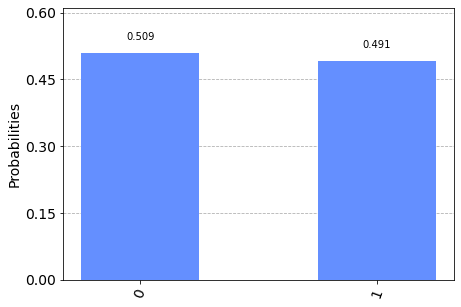

In [5]:
result = backend.run(qc, shots=8192).result()
plot_histogram(result.get_counts())

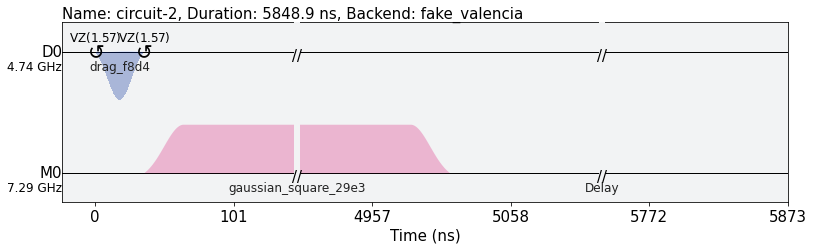

In [7]:
#step2: transpile the circuit into the basis gate of the backend
qc_t = transpile(qc, backend)
pulse_sched_qc = schedule(qc_t, backend)
draw(pulse_sched_qc, backend=backend)

In [8]:
pulse_sched_qc.flatten

<bound method Schedule.flatten of Schedule((0, ShiftPhase(-1.5707963267949, DriveChannel(0))), (0, ShiftPhase(-1.5707963267949, ControlChannel(1))), (0, Play(Drag(duration=160, amp=(0.09618851775276127+0.0008448724348311288j), sigma=40, beta=-0.35835396095069005, name='drag_f8d4'), DriveChannel(0), name='drag_f8d4')), (160, ShiftPhase(-1.5707963267949, DriveChannel(0))), (160, ShiftPhase(-1.5707963267949, ControlChannel(1))), (160, Play(GaussianSquare(duration=22400, amp=(0.075+0j), sigma=64, width=22144, name='gaussian_square_29e3'), MeasureChannel(0), name='gaussian_square_29e3')), (160, Acquire(26160, AcquireChannel(0), MemorySlot(0))), (22560, Delay(3760, MeasureChannel(0))), name="circuit-2")>

We can execute this circuit by using the pulse schedule. let's try this:

In [9]:
result = backend.run(pulse_sched_qc, shots=8192).result()

/Users/sophy/opt/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/providers/aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


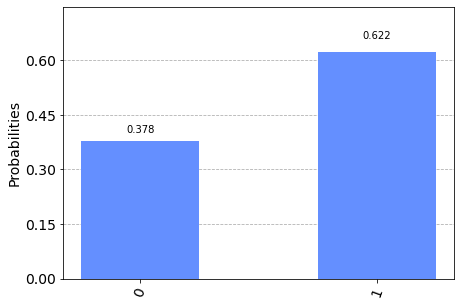

In [10]:
plot_histogram(result.get_counts())

Here, you can see the result is strange - not a 50:50. This is due to the old configuration of the fake_backend so please keep this in your mind that you will get and weired result when you using hadamard gate.

For our hands-on, let's build a two qubit circuit to check the pulse sequence.

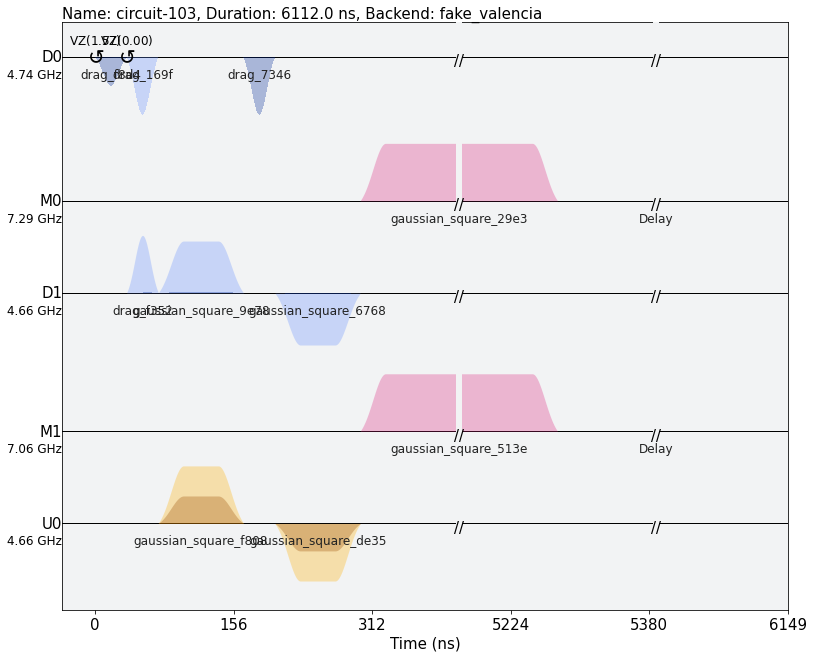

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

qc_t = transpile(qc, backend)
pulse_sched_qc = schedule(qc_t, backend)
draw(pulse_sched_qc, backend=backend)

You can see several pulse sequence above and below figure show you which block matches the gate and operations. You can see long pulse duration for the CX gate and it's due to the "echo" technique that IBM used to remove unexpected noise produced during the cross-resonance process. We will cover simply about the process of the cross resonance late - at the two qubit pulse gate. so please be patience.


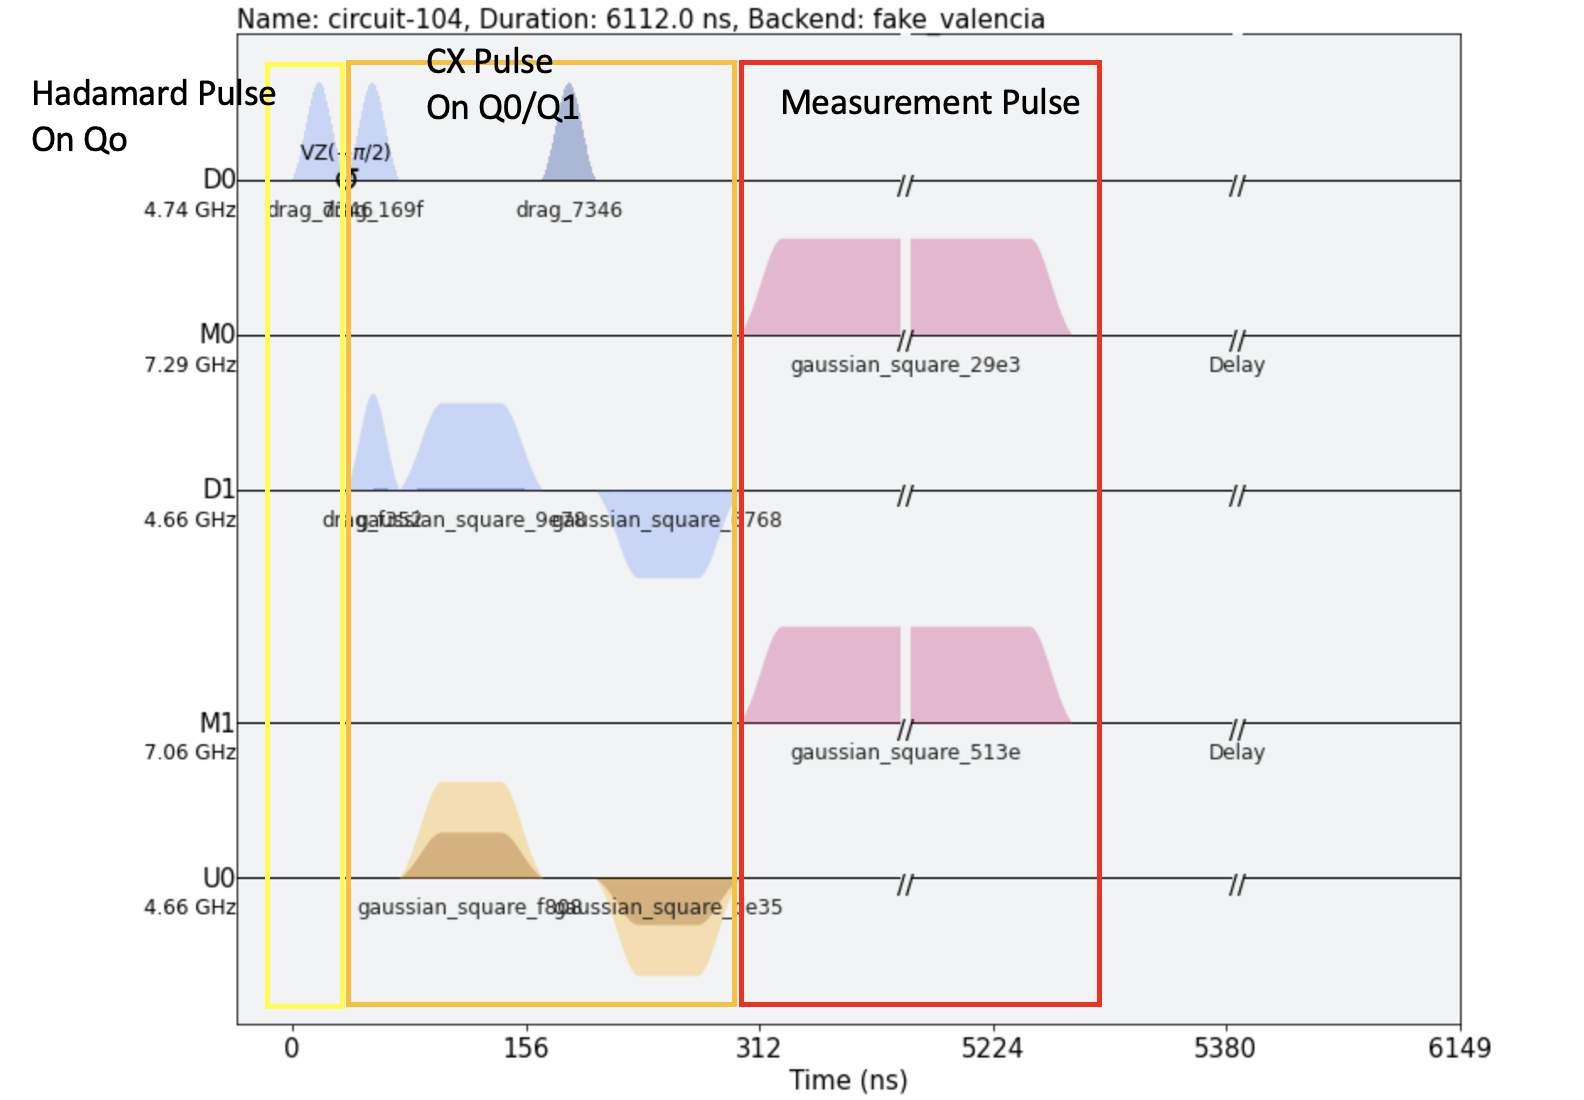

The main purpose of my lecture is to give you abundant tutorial materials to help you to do further research or exploration easily, so here, I will skip explaining the foundation of a superconducting qubit and theoretical things related to the dynamics of a qubit in detail.  

But I really hope that most of you take a look at additional materials which I left here to follow up about the superconducting qubit and it's foundation because there are abundant materials with kind explanation for you.

Additional materials:
- Introduction to Quantum Computing and Quantum Hardware: 
https://www.qiskit.org/learn/intro-qc-qh, especially Lecture 16 to 21
- Qiskit Seminar Series: Quantum Hardware Design: Energy, Circuits, and Metal | Zlatko Minev
https://www.youtube.com/watch?v=jjdYHZ0qxcY
- CQT Lecture: Qiskit Pulse: Programming Quantum Computers Through the Cloud with Pulses by Nick Bronn
https://www.youtube.com/watch?v=V_as5PufUiU

And I'm sure that you will find this lecture note is helpful to you when you try to do something interesting after learning more about the superconducting qubit because I will try to leave the most updated syntax to use Qiskit pulse in here. 

## Build pulse schedule with the Pulse Builder

### Builder

To build your own pulse sequence, first you need to prepare a `pulse builder` - packing pulse instruction and deliver this to the transpiler and backend. At below I will show you a very simple example to build a interesting pulse sequence by using builder. In this example, we will play a series of pulses on channels which defined as just an array:

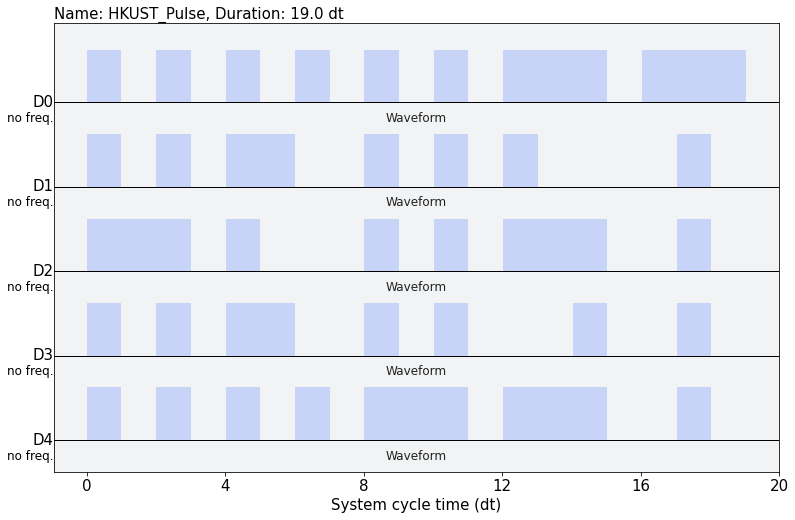

In [13]:
from qiskit import pulse

dc = pulse.DriveChannel
d0, d1, d2, d3, d4 = dc(0), dc(1), dc(2), dc(3), dc(4)

with pulse.build(name='HKUST_Pulse') as hkust:
    pulse.play([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1 ], d0)
    pulse.play([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0 ], d1)
    pulse.play([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0 ], d2)
    pulse.play([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0 ], d3)
    pulse.play([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0 ], d4)


draw(hkust)

At this code, you can see I briefly decalred 5 drive channels to play a pulse and play a constant pulse to make a lovely feature. You cannot play this pulse at the actual backend because there is no information about the each qubit and the classical register with each drive channel and also, there is a limit on pulse duration comes from the actual backend - usually the minimum duration of each pulse sequence need to be more than 64 (the actual running time is $64*0.222ns \approx 14ns$ and need to be the multiple of the 64).


### Channels
To play pulse at the actual backend, we need to define the exact drive channel. And below is an example how to get the exact qubit information of the backend. Here we are using FakeValencia, which has exactly same hardware composition with the ibmq_valencia.

In [14]:
with pulse.build(backend) as drive_sched_check:
    for i in range(5):
        print("The driveing channel of qubit{} is {}".format(i, pulse.drive_channel(i)))

The driveing channel of qubit0 is DriveChannel(0)
The driveing channel of qubit1 is DriveChannel(1)
The driveing channel of qubit2 is DriveChannel(2)
The driveing channel of qubit3 is DriveChannel(3)
The driveing channel of qubit4 is DriveChannel(4)


The control channel is the secondary drive channel for the given qubit – typically utilized for controlling multi-qubit interactions. it depends upon the qubit connectivity of a backend. for our examples,

In [15]:
from qiskit.tools.jupyter import *
backend

<FakeValencia('fake_valencia')>

The Q0 is connected with Q1 but not with Q2. So if we try to find a drive channel of Q0 with the connectivity (0,1) and (0,2), the result will be different.

In [16]:
#check the control channel btw 0-1
with pulse.build(backend) as control_sched_check:
    print("The control channel of qubit btw qubit (0,1) is {}".format(i, pulse.control_channels(0,1)))

The control channel of qubit btw qubit (0,1) is 4


In [17]:
with pulse.build(backend) as control_sched_check:
    print("The control channel of qubit btw qubit (0,2) is {}".format(i, pulse.control_channels(0,2)))

BackendConfigurationError: "Couldn't find the ControlChannel operating on qubits (0, 2) on 5-qubit system. The ControlChannel information is retrieved from the backend."

As you can see, it returns error. Let's do more example with the pulse channel info inside of the pulse builder: 

In [18]:
with pulse.build(backend) as drive_sched_check:
    for i in range(5):
        print("The acquire channel of qubit{} is {}".format(i, pulse.acquire_channel(i)))
        print("The measurement channel of qubit{} is {}".format(i, pulse.measure_channel(i)))

The acquire channel of qubit0 is AcquireChannel(0)
The measurement channel of qubit0 is MeasureChannel(0)
The acquire channel of qubit1 is AcquireChannel(1)
The measurement channel of qubit1 is MeasureChannel(1)
The acquire channel of qubit2 is AcquireChannel(2)
The measurement channel of qubit2 is MeasureChannel(2)
The acquire channel of qubit3 is AcquireChannel(3)
The measurement channel of qubit3 is MeasureChannel(3)
The acquire channel of qubit4 is AcquireChannel(4)
The measurement channel of qubit4 is MeasureChannel(4)


By using this pulse.channel_info() command, you can bring the specific channel name which working on the specific qubit. It usually has same order with the qubit name. 

Qiskit Pulse has 4 type of channels:
- DriveChannel(i): Transmit channel connected to qubit i, with signals typically modulated at a frequcney in resonance with qubit i
- ControlChannel(i): Transmit channel whith signals typically modulated at a frequency off resonant from its associated qubit.
- MeasureChannel(i): Transmit channel connected to the readout resonator of qubit i
- AcqureChannel(i) : Receive channel connected to the readout resonator of qubit and stor result into a register slot

### instructions

After getting some information about the physical channel information of a qubit inside of the PulseBuilder, we can send some `instruction` to tell the hardware do actual pulse operation. Here is the simple example for this:

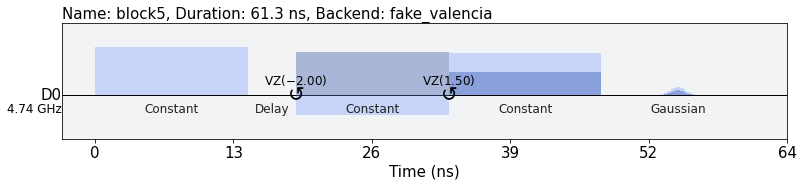

In [19]:
with pulse.build(backend) as actual_playing:
    d0 = pulse.drive_channel(0)

    a0 = pulse.acquire_channel(0)

    #play square constant pulse at drive channel 0 with the duration 10 (computational duration) amplitude 1.0
    pulse.play(pulse.library.Constant(64, 1.0), d0)

    #give 20 steps of delay to the d0
    pulse.delay(20, d0)
    #give pi/2 phase shift to the d0 
    pulse.shift_phase(2, d0)
    pulse.play(pulse.library.Constant(64, 1.0), d0)

    #set phase of d0 as pi
    pulse.set_phase(0.5, d0)
    pulse.play(pulse.library.Constant(64, 1), d0)
    
    #define inner pulse schedule inside of the pulse builder
    with pulse.build() as inner_sched:
        #play a gaussian pulse with duration 20, amplitude 1, sigma 3.0 to d0
        pulse.play(pulse.library.Gaussian(64, 0.2, 3.0), d0)
    #play inner schedule at the main schedule
    pulse.call(inner_sched)

draw(actual_playing, backend = backend)

There four major instruction in Qiskit pulse to compose a pulse schedule:
- Play: Output the waveform described by pulse on the pulse channel
- Delay: Idle the pulse channel for the given duration
- shift_phase / shift_frequency : Increase the phase of the chennel/ set the frequency of the channel, usually blocked in using inside of the pulse builder for the stable operation.So if you want to change drive frequency of a qubit, you need to set a outside loop for this and you will learn how to do this at Part2 lecture.
- Acquire: Trigger the acquire channel to collect date for the given duration and store the measurement result in a register

### Contexts

In composing multi qubit sequence, qiskit pulse provide you an alignment options to build pulse easily. Below example added one more qubit to compose pulse schedule and you can see `default_alignment` options. If you change it, you can see a different pulse schedule like below. Try other options by remove #:

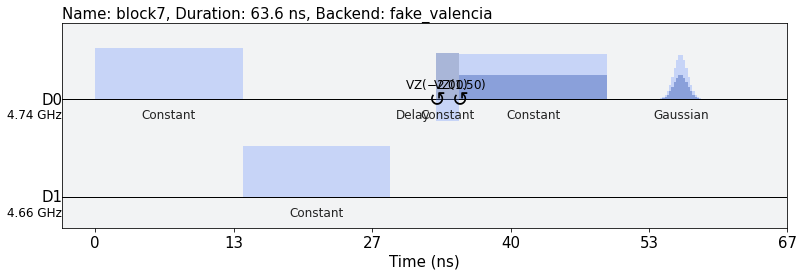

In [20]:
#with pulse.build(backend, default_alignment='left') as actual_playing:
#with pulse.build(backend, default_alignment='right') as actual_playing:
with pulse.build(backend, default_alignment='sequential') as actual_playing_two:


    d0 = pulse.drive_channel(0)
    d1 = pulse.drive_channel(1)
    a0 = pulse.acquire_channel(0)

    #play square constant pulse at drive channel 0 with the duration 10 (computational duration) amplitude 1.0
    pulse.play(pulse.library.Constant(64, 1.0), d0)
    pulse.play(pulse.library.Constant(64, 1.0), d1)


    #give 20 steps of delay to the d0
    pulse.delay(20, d0)
    #give pi/2 phase shift to the d0 
    pulse.shift_phase(2, d0)
    pulse.play(pulse.library.Constant(10, 1.0), d0)

    #set phase of d0 as pi
    pulse.set_phase(0.5, d0)
    pulse.play(pulse.library.Constant(64, 1.0), d0)
    
    #define inner pulse schedule inside of the pulse builder
    with pulse.build() as inner_sched:
        #play a gaussian pulse with duration 20, amplitude 1, sigma 3.0 to d0
        pulse.play(pulse.library.Gaussian(64, 1.0, 3.0), d0)
    #play inner schedule at the main schedule
    pulse.call(inner_sched)

draw(actual_playing_two, backend = backend)

### Macros

Next step is measuring our pulse sequence. For this, Qiskit provide some `macros` - predefined functions. You can check the whole macro command of Qiskit pulse at [here](https://qiskit.org/documentation/apidoc/pulse.html). The most wide used and useful `macro` is `measure`. By using this, let's measure our pulse sequence.

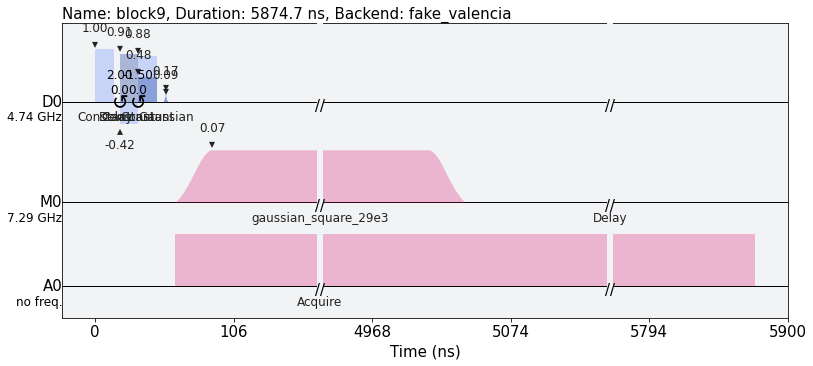

In [21]:
with pulse.build(backend, default_alignment='sequential') as meas:
    pulse.call(actual_playing)
    
    with pulse.align_left():
        pulse.measure(0)

draw(meas, style=IQXDebugging(), backend = backend)

And let's run this pulse schedule at our backend.

In [22]:
result = backend.run(meas, shots=8192).result()

#this returns same result
#result = backend_sim.run(meas, shots=8192).result()

result.get_counts()

/Users/sophy/opt/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/providers/aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


{'0': 3821, '1': 4371}

Here I will show alternative way to get measurement result we can play with the Pulse Builder:

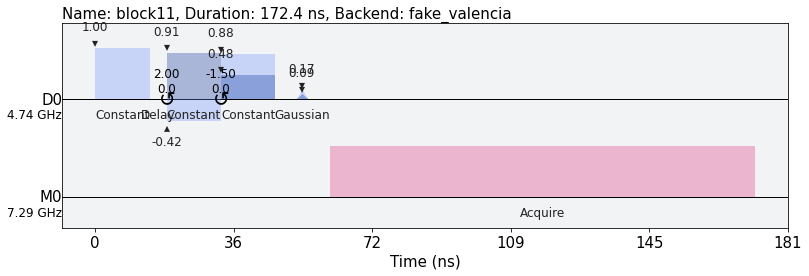

In [23]:
with pulse.build(backend, default_alignment='sequential') as meas1:
    
    a0 = pulse.acquire_channel(0)
    m0 = pulse.MeasureChannel(0)

    pulse.call(actual_playing)
    
    #the below code works same
    #pulse.acquire(500, a0, pulse.MemorySlot(0))
    pulse.acquire(500, m0, pulse.MemorySlot(0))

draw(meas1, style=IQXDebugging(), backend = backend)

Let's run this:

In [24]:
result = backend.run(meas1, shots=8192).result()
result.get_counts()

/Users/sophy/opt/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/providers/aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


{'0': 3898, '1': 4294}

As you can see, you can get a similar result with above. The reason why this two code returns similar result even the `meas1` does not have any signal at the measurement channel. 

For this, let's check the pre-defined pulse sequence of the `measure` and plot the shcedule:

In [25]:
config = backend.configuration()

predefined_meas_sched = backend.defaults().instruction_schedule_map.get('measure', qubits=config.meas_map[0][1])
predefined_meas_sched.flatten


<bound method Schedule.flatten of Schedule((0, Play(GaussianSquare(duration=22400, amp=(0.0400000000000001+0j), sigma=64, width=22144, name='gaussian_square_513e'), MeasureChannel(1), name='gaussian_square_513e')), (0, Acquire(26160, AcquireChannel(0), MemorySlot(0))), (0, Acquire(26160, AcquireChannel(1), MemorySlot(1))), (0, Acquire(26160, AcquireChannel(2), MemorySlot(2))), (0, Acquire(26160, AcquireChannel(3), MemorySlot(3))), (0, Acquire(26160, AcquireChannel(4), MemorySlot(4))), (22400, Delay(3760, MeasureChannel(1))), name="measure")>

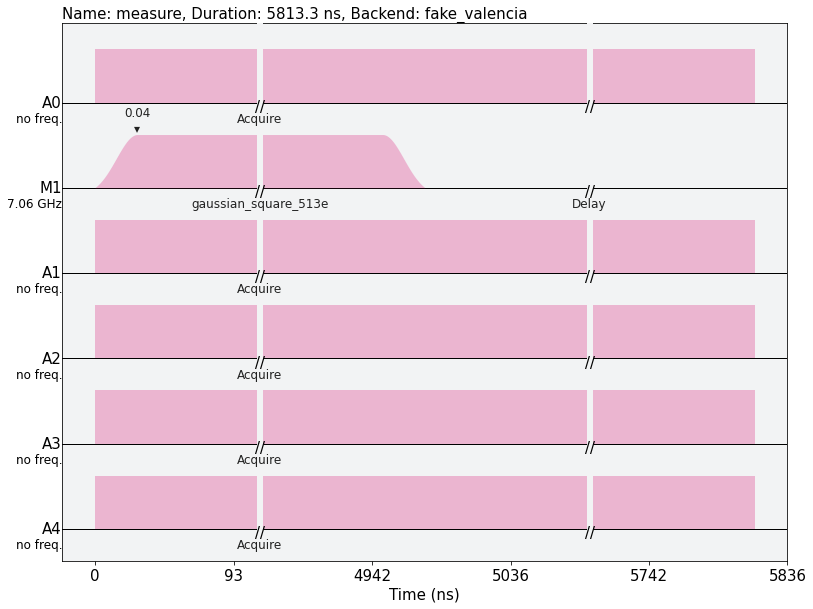

In [26]:
draw(predefined_meas_sched, style=IQXDebugging(), backend = backend)

As you can see above, the predefined measurement schedule constitute with some acquire command and play to measurement channel.

    Schedule(
        (0, Acquire(9776, AcquireChannel(0), MemorySlot(0))), 
        (0, Acquire(9776, AcquireChannel(1), MemorySlot(1))), 
        (0, Acquire(9776, AcquireChannel(2), MemorySlot(2))), 
        (0, Acquire(9776, AcquireChannel(3), MemorySlot(3))), 
        (0, Acquire(9776, AcquireChannel(4), MemorySlot(4))), 
        (0, Play(GaussianSquare(duration=9776, amp=(0.07611514117554612-0.024626921931631757j), sigma=64, width=9520, name='gaussian_square_7ee7'), MeasureChannel(0), name='gaussian_square_7ee7')), 
        (9776, Delay(3824, MeasureChannel(0))), name="measure")>

The process of measurement is usually achieved by play some signals through the measure_channel and acquire it through acquire channel but if we call acqure, qiskit automatically send measurement signal to the backend to get the result. 

Note: Even we can get measurement result only call the `acquire` instruction, we suggest you to use the `measure` macro to guarantee the fine result.

### Circuit Gates

You can also use pre-defined circuit gates inside of the pulse builder. It supports:
- cx(control, target)
- u1(theta, qubit)
- u2(phi, lam, qubit)
- u3(theta, phi, lam, qubit)

So we can compuse upper entanglement gate operation by using this inside of the pulse builder. Let's try this.

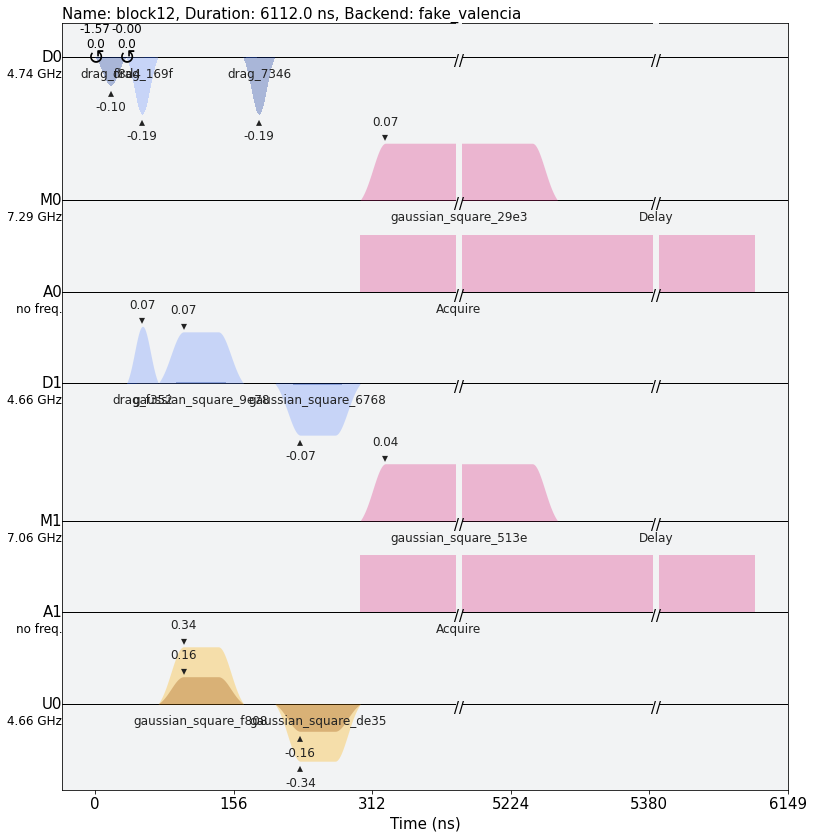

In [27]:

with pulse.build(backend, default_alignment='sequential') as entangle_circ:
    pulse.u2(0, np.pi, 0)
    pulse.cx(0,1)
    
    with pulse.align_left():
        pulse.measure(0)
        pulse.measure(1)
    
draw(entangle_circ, style=IQXDebugging(), backend=backend)
